In [ ]:
%pip install numpy pandas matplotlib scikit-learn 

Problema binário: versicolor (1) vs virginica (0)
Features usadas: ['petal length (cm)', 'petal width (cm)'] 

Tamanhos -> treino: 70 | teste: 30

=== Desempenho no TESTE ===
Acurácia : 0.967
Precisão : 1.0
Recall   : 0.933
F1       : 0.966

Matriz de Confusão (linhas=Real, colunas=Previsto):
           Prev 0  Prev 1
Real 0  |    15       0   <- virginica
Real 1  |     1      14   <- versicolor



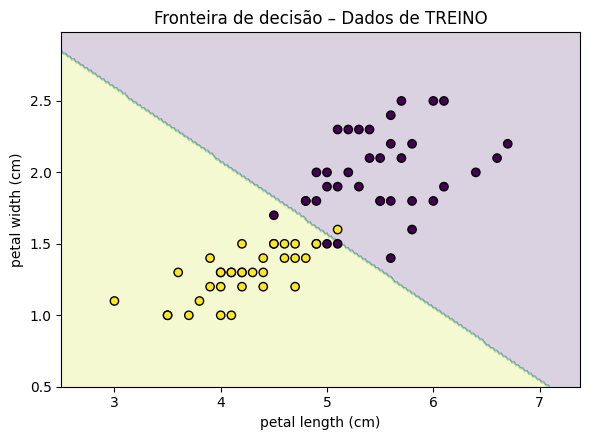

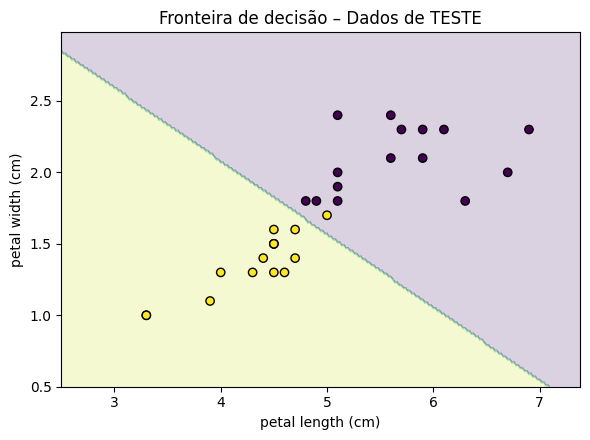

=== Predições Individuais ===
Entrada [np.float64(4.7), np.float64(1.4)] -> prev=versicolor (1) | P(virginica)= 0.184 | P(versicolor)= 0.816
Entrada [np.float64(4.3), np.float64(1.3)] -> prev=versicolor (1) | P(virginica)= 0.052 | P(versicolor)= 0.948


In [2]:
# ===============================================================
# Iris binário (versicolor=1 vs virginica=0) com 2 features
# Modelo: Regressão Logística
# Saídas:
#   - métricas e matriz de confusão no teste
#   - figura 1: fronteira de decisão + pontos de TREINO
#   - figura 2: fronteira de decisão + pontos de TESTE
# ===============================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 1) Carregar a base Iris e tornar BINÁRIA: versicolor (1) vs virginica (0)
iris = load_iris()
X_full = iris.data          # (150, 4): [sepal len, sepal wid, petal len, petal wid]
y_full = iris.target        # 0=setosa, 1=versicolor, 2=virginica

# Remover Setosa e mapear: 1=versicolor, 0=virginica
mask = (y_full != 0)
X = X_full[mask]
y = y_full[mask]
y = (y == 1).astype(int)    # versicolor -> 1, virginica -> 0

# Usar só 2 features para visualização 2D: pétalas
#   2: petal length (cm), 3: petal width (cm)
cols = [2, 3]
X2 = X[:, cols]
feature_names = [iris.feature_names[i] for i in cols]

print("Problema binário: versicolor (1) vs virginica (0)")
print("Features usadas:", feature_names, "\n")

# 2) Separar em treino e teste (estratificado preserva a proporção das classes)
X_train, X_test, y_train, y_test = train_test_split(
    X2, y, test_size=0.30, random_state=42, stratify=y
)

print(f"Tamanhos -> treino: {X_train.shape[0]} | teste: {X_test.shape[0]}\n")

# 3) Criar pipeline: padronizar + Regressão Logística
modelo = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=42)
)

# 4) Treinar
modelo.fit(X_train, y_train)

# 5) Avaliar no teste
y_pred = modelo.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  # linhas = real, colunas = previsto

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label=1)  # positivo = versicolor
rec  = recall_score(y_test, y_pred, pos_label=1)
f1   = f1_score(y_test, y_pred, pos_label=1)

print("=== Desempenho no TESTE ===")
print("Acurácia :", round(acc, 3))
print("Precisão :", round(prec, 3))
print("Recall   :", round(rec, 3))
print("F1       :", round(f1, 3))
print("\nMatriz de Confusão (linhas=Real, colunas=Previsto):")
print("           Prev 0  Prev 1")
print(f"Real 0  |   {cm[0,0]:>3}     {cm[0,1]:>3}   <- virginica")
print(f"Real 1  |   {cm[1,0]:>3}     {cm[1,1]:>3}   <- versicolor\n")

# 6) Função para plote da fronteira de decisão com um subconjunto (treino/teste)
def plot_fronteira(modelo, X_all, X_set, y_set, title, savepath=None):
    # grade para cobrir o espaço 2D das duas features
    h = 0.02
    x_min, x_max = X_all[:,0].min() - 0.5, X_all[:,0].max() + 0.5
    y_min, y_max = X_all[:,1].min() - 0.5, X_all[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = modelo.predict(grid).reshape(xx.shape)

    plt.figure(figsize=(6,4.5))
    # Áreas de decisão (cores de fundo)
    plt.contourf(xx, yy, Z, alpha=0.2)
    # Pontos do subconjunto indicado (treino ou teste)
    # c=y_set pinta pela classe real; edgecolors deixa contorno preto
    plt.scatter(X_set[:,0], X_set[:,1], c=y_set, edgecolors="k")
    plt.xlabel(feature_names[0])  # petal length
    plt.ylabel(feature_names[1])  # petal width
    plt.title(title)
    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, dpi=150)
    plt.show()

# 7) Gerar e mostrar as duas figuras
plot_fronteira(modelo, X2, X_train, y_train,
               "Fronteira de decisão – Dados de TREINO",
               savepath=None)  # opcional: 'fronteira_treino.png'

plot_fronteira(modelo, X2, X_test, y_test,
               "Fronteira de decisão – Dados de TESTE",
               savepath=None)  # opcional: 'fronteira_teste.png'

# 8) Predições individuais (exemplos com [petal length, petal width])
samples = np.array([
    [4.7, 1.4],  # mais típico de virginica (0), mas veja a probabilidade
    [4.3, 1.3],  # pode ficar perto da fronteira
])
probas = modelo.predict_proba(samples)  # colunas: [P(0), P(1)]
preds  = modelo.predict(samples)

print("=== Predições Individuais ===")
for x, p, pred in zip(samples, probas, preds):
    print(f"Entrada {list(x)} -> prev={'versicolor (1)' if pred==1 else 'virginica (0)'} "
          f"| P(virginica)= {p[0]:.3f} | P(versicolor)= {p[1]:.3f}")
